# Importing Libraries

In [355]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_colwidth",None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Project 
## Health And Lifestyle Prediction Analysis 

In [356]:
df=pd.read_csv(r"c:\Users\user\Desktop\Datasets To Upload Kaggle\synthetic_health_lifestyle_dataset.csv")

# Data Info

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB


In [358]:
df.shape

(7500, 13)

In [359]:
df.sample()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
2033,2034,55,Other,143.0,42.2,20.6,No,1-2 times/week,Excellent,Low,No,10,7.1


# Data Cleaning & Handling

In [360]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [361]:
df["Exercise_Freq"]=df["Exercise_Freq"].fillna(df["Exercise_Freq"].mode()[0])
df["Alcohol_Consumption"]=df["Alcohol_Consumption"].fillna(df["Alcohol_Consumption"].mode()[0])

In [362]:
exercise_map={
    "Daily":2,
    "1-2 times/week":1,
    "3-5 times/week":0
}
df["Exercise_Freq"]=df["Exercise_Freq"].map(exercise_map)

In [363]:
df.drop(columns=["ID"],inplace=True)

In [364]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

# Average BMI Classification By Gender

In [365]:
classifi_bmi=df.groupby("Gender")["BMI"].mean().reset_index()
classifi_bmi

,Gender,BMI
0,Female,26.040837
1,Male,26.099020
2,Other,25.954326


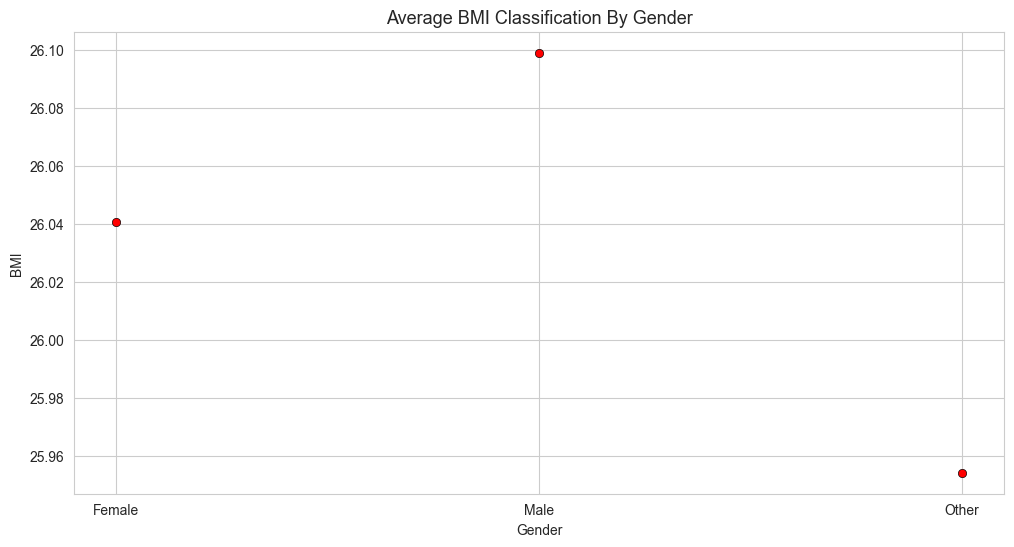

In [366]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.scatterplot(data=classifi_bmi,x="Gender",y="BMI",color="red",edgecolor="black")
plt.title("Average BMI Classification By Gender",size=13)
plt.show()

# Smoker & Non Smoker Classification Based On Gender 

In [367]:
classifi_sm=df.groupby(["Gender","Smoker"]).size().reset_index(name="Count")
classifi_sm.style.background_gradient(cmap="Reds")

,Gender,Smoker,Count
0,Female,No,1765
1,Female,Yes,745
2,Male,No,1783
3,Male,Yes,768
4,Other,No,1715
5,Other,Yes,724


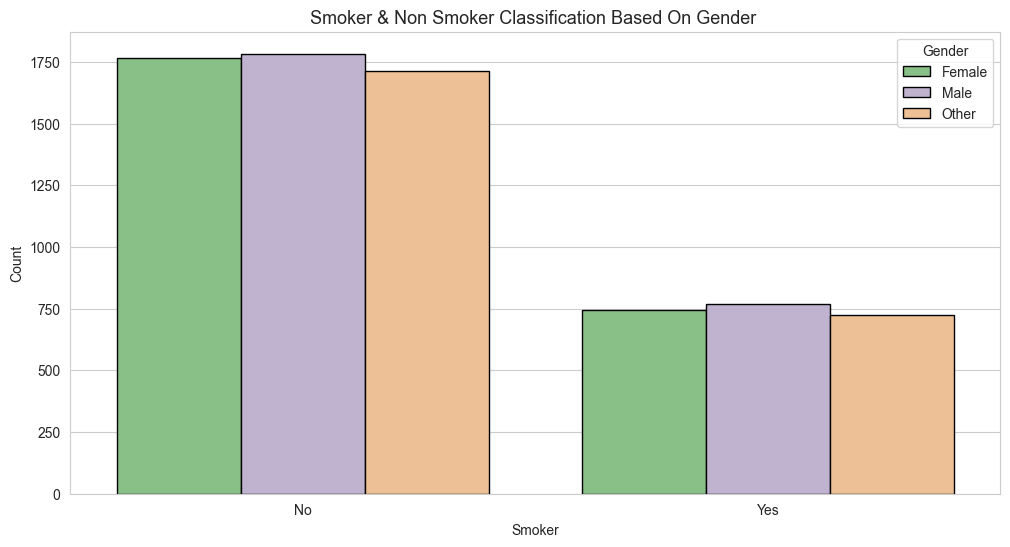

In [368]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=classifi_sm,x="Smoker",y="Count",hue="Gender",palette="Accent",edgecolor="black")
plt.title("Smoker & Non Smoker Classification Based On Gender ",size=13)
plt.show()

# Stress Level Classification By Gender

In [369]:
classifi_str=df.groupby("Gender")["Stress_Level"].sum().reset_index()
classifi_str.style.background_gradient(cmap="Oranges")

,Gender,Stress_Level
0,Female,14098
1,Male,14415
2,Other,13426


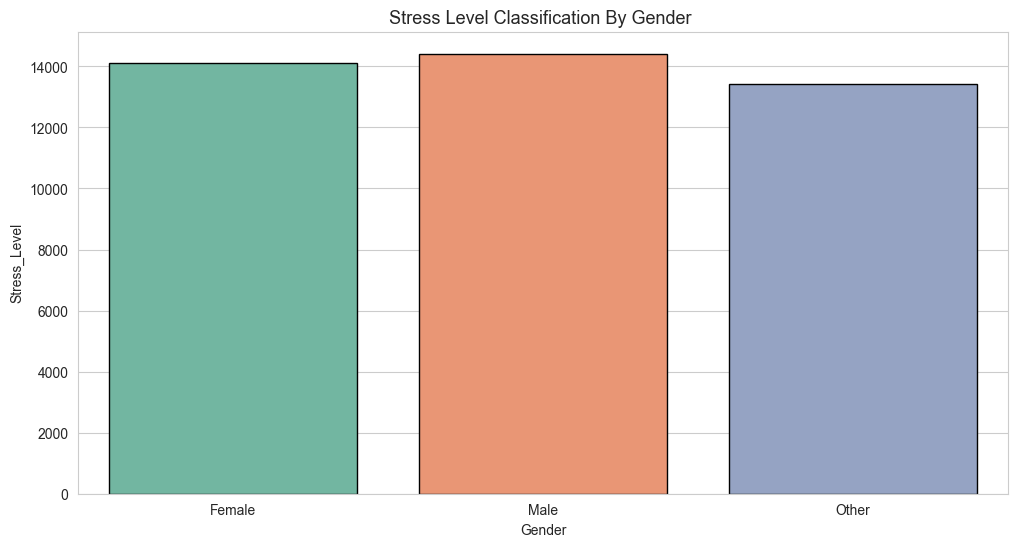

In [370]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=classifi_str,x="Gender",y="Stress_Level",palette="Set2",edgecolor="black")
plt.title("Stress Level Classification By Gender ",size=13)
plt.show()

# Diet Quality & Alcohol Consumption By Gender & Age 

In [371]:
classifi_di=df.groupby(["Gender","Age","Diet_Quality","Alcohol_Consumption"]).size().reset_index(name="Count")
classifi_di

,Gender,Age,Diet_Quality,Alcohol_Consumption,Count
0,Female,18,Average,High,1
1,Female,18,Average,Low,1
2,Female,18,Average,Moderate,1
3,Female,18,Excellent,High,2
4,Female,18,Excellent,Low,5
...,...,...,...,...,...
1805,Other,69,Good,Low,5
1806,Other,69,Good,Moderate,3
1807,Other,69,Poor,High,3
1808,Other,69,Poor,Low,6


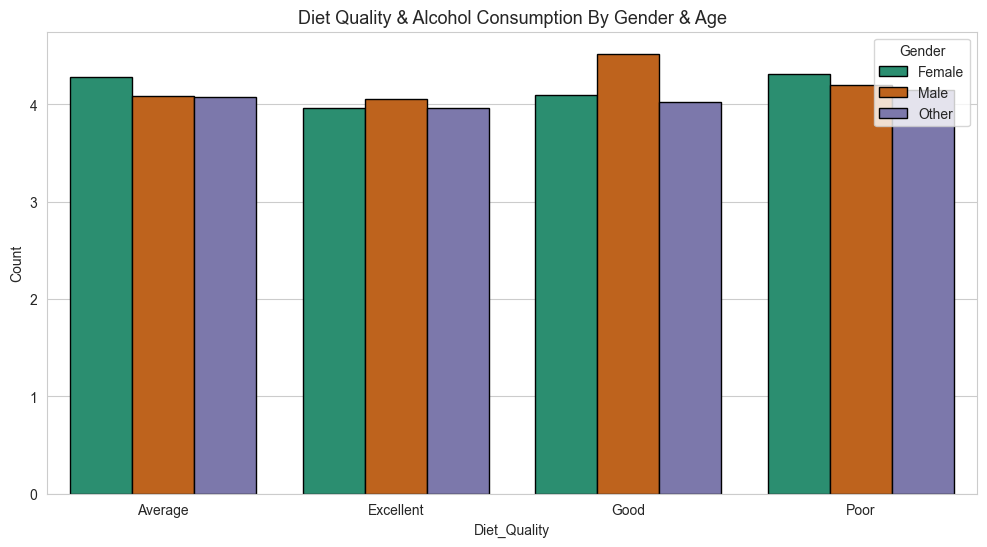

In [372]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_di,x="Diet_Quality",y="Count",hue="Gender",ci=None,palette="Dark2",edgecolor="black")
plt.title("Diet Quality & Alcohol Consumption By Gender & Age",size=13)
plt.show()

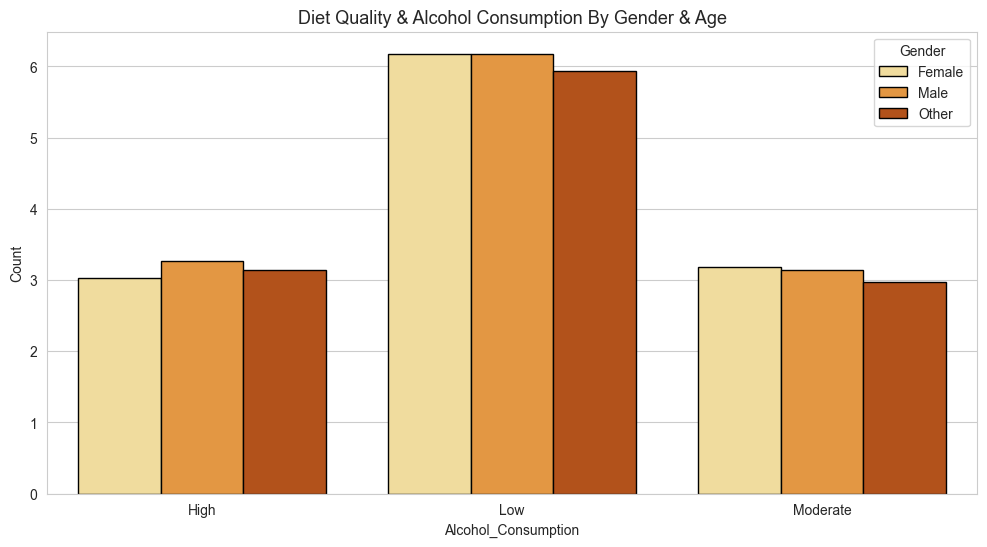

In [373]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_di,x="Alcohol_Consumption",y="Count",hue="Gender",ci=None,palette="YlOrBr",edgecolor="black")
plt.title("Diet Quality & Alcohol Consumption By Gender & Age",size=13)
plt.show()

# Average Sleep Hours By Gender 

In [374]:
classifi_sl=df.groupby("Gender")["Sleep_Hours"].mean().reset_index()
classifi_sl.style.background_gradient(cmap="Purples")

,Gender,Sleep_Hours
0,Female,7.023825
1,Male,7.008114
2,Other,6.976015


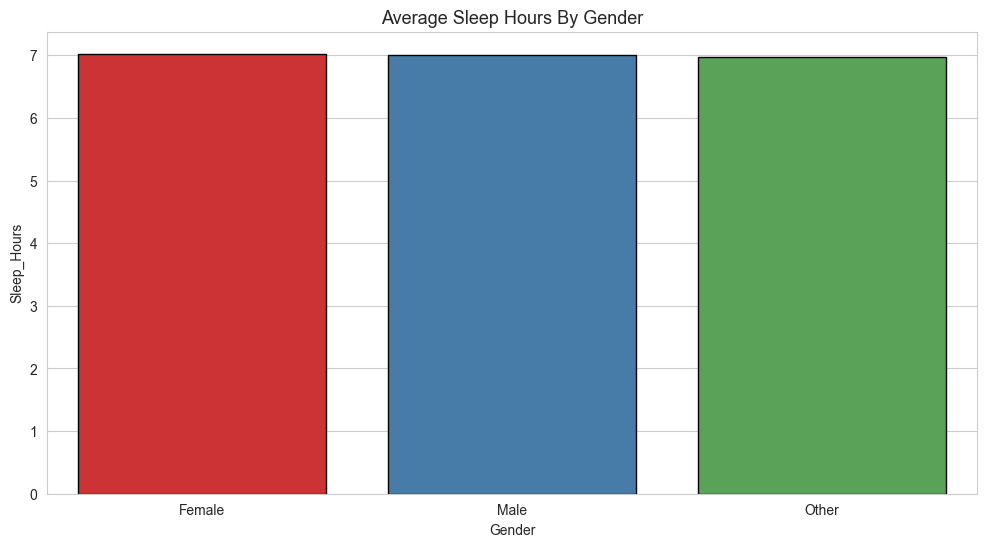

In [375]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_sl,x="Gender",y="Sleep_Hours",edgecolor="black",palette="Set1")
plt.title('Average Sleep Hours By Gender',size=13)
plt.show()

In [376]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,177.6,37.3,11.8,Yes,2,Poor,Low,No,9,8.5
1,69,Other,169.3,70.7,24.7,No,1,Good,High,No,2,5.9
2,46,Female,159.1,69.0,27.3,No,2,Excellent,Moderate,No,3,4.8
3,32,Male,170.6,76.4,26.3,No,0,Excellent,Moderate,No,9,6.6
4,60,Male,158.4,60.4,24.1,No,0,Excellent,Low,Yes,6,6.1


# Machine Learning

In [377]:
le=LabelEncoder()
cols=df[["Gender","Diet_Quality","Alcohol_Consumption","Chronic_Disease","Smoker"]]
for col in cols:
    df[col]=le.fit_transform(df[col])

In [378]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,2,177.6,37.3,11.8,1,2,3,1,0,9,8.5
1,69,2,169.3,70.7,24.7,0,1,2,0,0,2,5.9
2,46,0,159.1,69.0,27.3,0,2,1,2,0,3,4.8
3,32,1,170.6,76.4,26.3,0,0,1,2,0,9,6.6
4,60,1,158.4,60.4,24.1,0,0,1,1,1,6,6.1


In [379]:
x=df.drop(columns=["Chronic_Disease"])
y=df["Chronic_Disease"]

In [380]:
# Step 1: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Step 3: Scale the resampled training set and original test set
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_resampled)
x_test_scaled = scaler.transform(x_test)


## Logistic Regression Model

In [381]:
model=LogisticRegression(class_weight="balanced")
model.fit(x_train_scaled,y_resampled)

LogisticRegression(class_weight='balanced')

In [382]:
y_pred=model.predict(x_test_scaled)
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.562
Confusion Matrix:
 [[752 447]
 [210  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70      1199
           1       0.17      0.30      0.22       301

    accuracy                           0.56      1500
   macro avg       0.48      0.46      0.46      1500
weighted avg       0.66      0.56      0.60      1500



## Random Forest Classifier Model

In [383]:
modelr = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # you can limit this if overfitting
    random_state=42, 
    class_weight="balanced" # helpful for imbalanced datasets
)
modelr.fit(x_train_scaled,y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [384]:
df["Chronic_Disease"].value_counts()

Chronic_Disease
0    6052
1    1448
Name: count, dtype: int64

In [385]:
y_pred=modelr.predict(x_test_scaled)
# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6706666666666666
Confusion Matrix:
 [[956 243]
 [251  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1199
           1       0.17      0.17      0.17       301

    accuracy                           0.67      1500
   macro avg       0.48      0.48      0.48      1500
weighted avg       0.67      0.67      0.67      1500



## XGBoost Model

In [386]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Create the model
modelx = XGBClassifier(
    use_label_encoder=False,     # suppress deprecation warning
    eval_metric='logloss',       # common for binary classification
    scale_pos_weight=4.0,        # handle class imbalance; adjust based on 0/1 ratio
    random_state=42
)

# 2. Fit the model
modelx.fit(x_train_scaled, y_resampled)

y_proba = modelx.predict_proba(x_test_scaled)[:, 1]
y_pred = (y_proba >= 0.4).astype(int)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.49066666666666664
Confusion Matrix:
 [[593 606]
 [158 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.49      0.61      1199
           1       0.19      0.48      0.27       301

    accuracy                           0.49      1500
   macro avg       0.49      0.48      0.44      1500
weighted avg       0.67      0.49      0.54      1500



# Correlation Heatmap

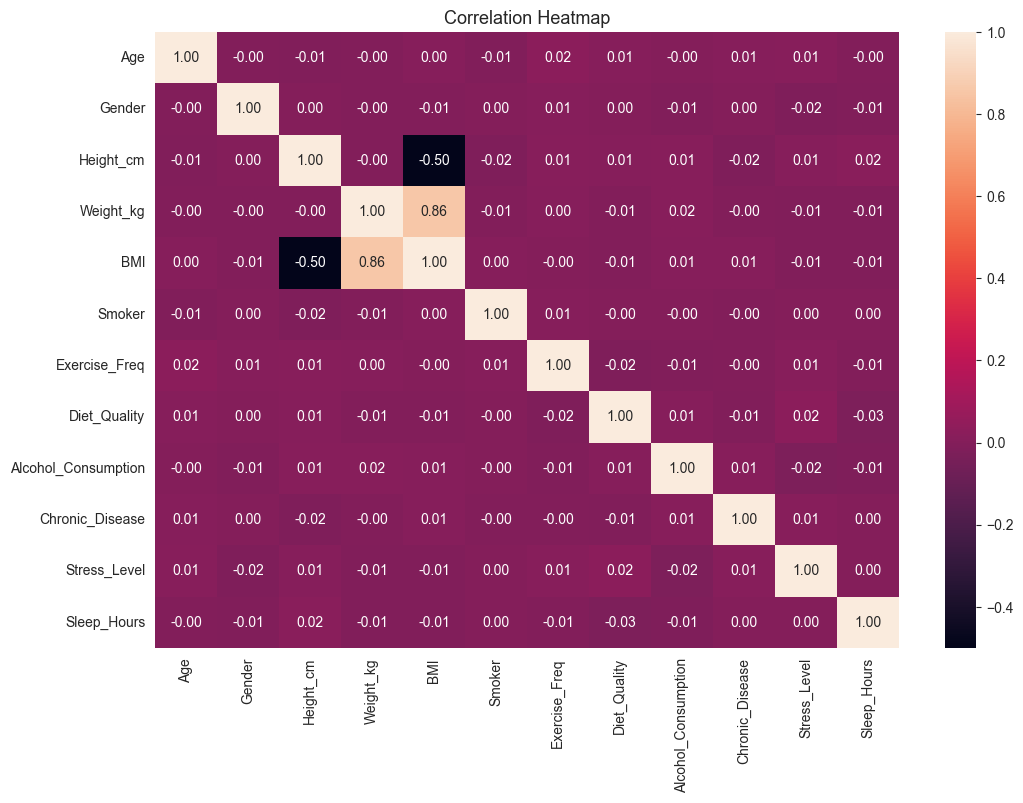

In [387]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.title("Correlation Heatmap",size=13)
plt.show()